# Multivariate Normal Sampling
## custom function vs. numpy function

In [1]:
import numpy as np
import scipy.linalg as spla

#custom function for multivariate normal sampling
def multivariate_normal(mu, VCV, n):
    L = spla.cholesky(VCV)
    Z = np.random.normal(size=(n, VCV.shape[0]))
    return Z.dot(L) + mu

In [2]:
np.random.seed(1)
n=10000
mu = np.array([.05, .08])
VCV = np.array([[0.04, 0.036],[0.036, 0.09]])
X = multivariate_normal(mu, VCV, n=n)
#numpy function for multivariate normal sampling
Y = np.random.multivariate_normal(mu, VCV, size=(n,))

In [3]:
print(X.mean(axis=0))
print(Y.mean(axis=0))

[0.05352864 0.08355135]
[0.04968091 0.07783736]


In [4]:
print(np.cov(X.T))
print(np.cov(Y.T))

[[0.04043025 0.0356145 ]
 [0.0356145  0.0883394 ]]
[[0.0397471  0.03621014]
 [0.03621014 0.09082396]]


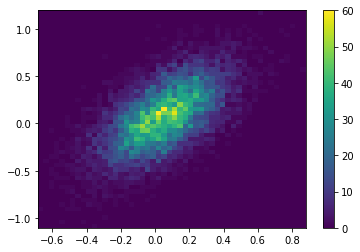

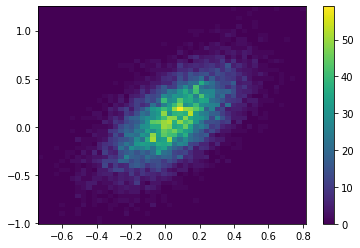

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.hist2d(X[:,0],X[:,1],bins=50)
plt.colorbar()
plt.show()
plt.hist2d(Y[:,0],Y[:,1],bins=50)
plt.colorbar()

# Convert Normal Sample to t-distribution Sample

mu= 0.0606, std=0.8852
mu= 0.0813, std=1.2693


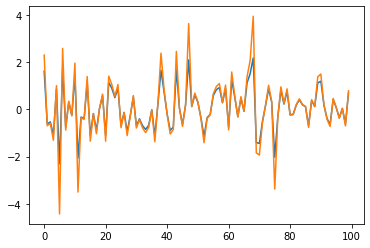

In [23]:
import numpy as np
from scipy.stats import norm
from scipy.stats import t
import matplotlib.pyplot as plt

np.random.seed(1)
#normal sample
z = np.random.normal(size=100)
#print(z)
#find the probability (CDF)
p = norm.cdf(z)
#print(p)
#find the probability (percent point function)
t = t.ppf(p, df=3)
#print(t)

print('mu= {:5.4f}, std={:5.4f}'.format(z.mean(),z.std()))
print('mu= {:5.4f}, std={:5.4f}'.format(t.mean(),t.std()))
                              
plt.plot(z)
plt.plot(t)

# Convert Normal Sample to Levy Sample

mu= 0.0606, std=0.8852
mu= 0.0602, std=1.1235


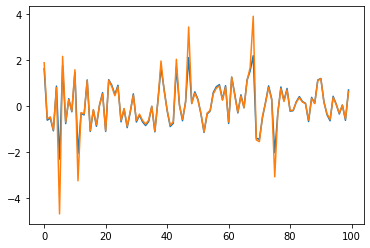

In [24]:
import numpy as np
from scipy.stats import norm
from scipy.stats import levy_stable
import matplotlib.pyplot as plt

np.random.seed(1)
#normal sample
z = np.random.normal(size=100)
#print(z)
#find the probability (CDF)
p = norm.cdf(z)
#print(p)
#find the probability (percent point function)
α = 1.5
scale = 0.5 ** (1/α)
l = levy_stable.ppf(p, α, 0, scale=scale)
#print(t)

print('mu= {:5.4f}, std={:5.4f}'.format(z.mean(),z.std()))
print('mu= {:5.4f}, std={:5.4f}'.format(l.mean(),l.std()))
                              
plt.plot(z)
plt.plot(l)

standard normal: mu= 0.0606, std=0.8852, kurtosis=-0.0011
student t dist : mu= 0.0813, std=1.2693, kurtosis=2.2274
Levy stable    : mu= 0.0602, std=1.1235, kurtosis=4.3650


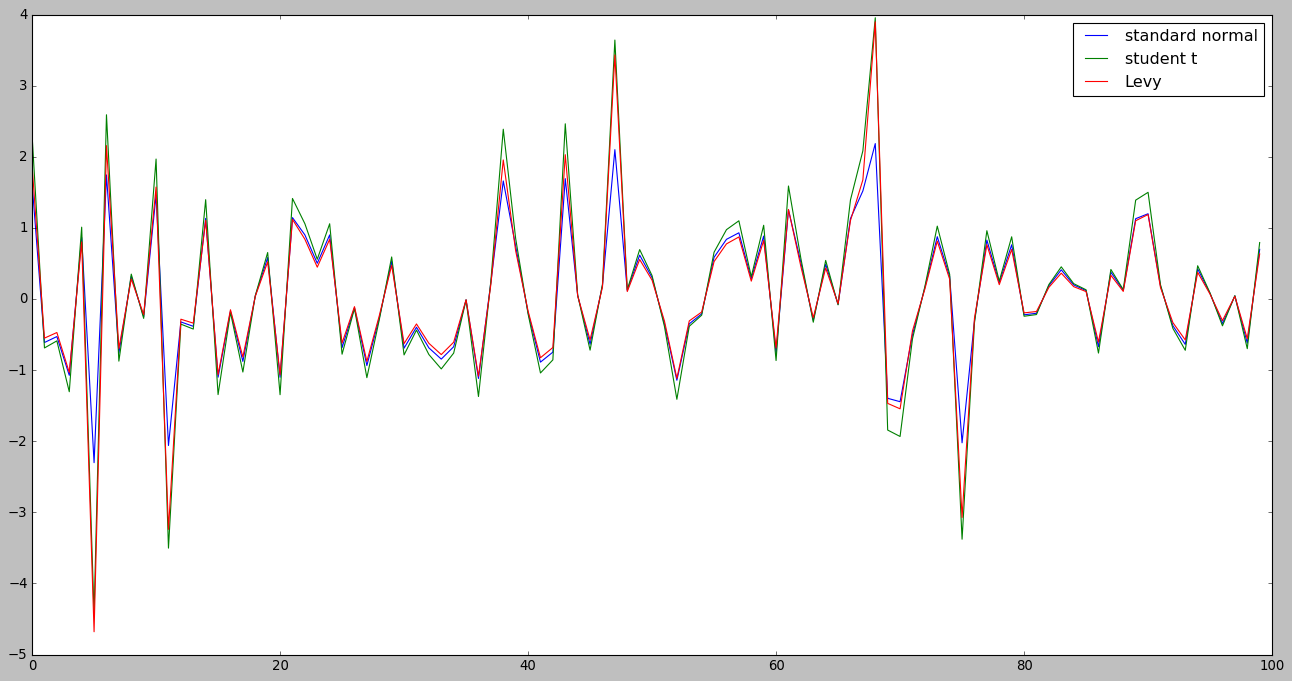

In [37]:
import numpy as np
from scipy.stats import norm, kurtosis
from scipy.stats import t
from scipy.stats import levy_stable
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)
#normal sample
z = np.random.normal(size=100)

#find the probability (CDF)
p = norm.cdf(z)

#find the probability (percent point function)
#t-distribution
t = t.ppf(p, df=3)

#Levy-distribution
α = 1.5
scale = 0.5 ** (1/α)
l = levy_stable.ppf(p, α, 0, scale=scale)

print('standard normal: mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(z.mean(),z.std(),kurtosis(z)))
print('student t dist : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(t.mean(),t.std(),kurtosis(t)))
print('Levy stable    : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(l.mean(),l.std(),kurtosis(l)))

plt.figure(figsize=(20,10))
plt.style.use('classic')
plt.plot(z)
plt.plot(t)
plt.plot(l)
plt.legend(('standard normal','student t','Levy'))

In [1]:
import numpy as np
from scipy.stats import norm, kurtosis, t, levy_stable

np.random.seed(1)

#t-dist random variable
df=3
r = t.rvs(df=df, size=100)

#convert to normal random variable
p = t.cdf(r, df=df)
z = norm.ppf(p)

#back to t-dist random variable
p = norm.cdf(z)
t = t.ppf(p, df=df)

print('initial student t dist : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(r.mean(),r.std(),kurtosis(r)))
print('standard normal: mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(z.mean(),z.std(),kurtosis(z)))
print('final student t dist : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(t.mean(),t.std(),kurtosis(t)))


initial student t dist : mu= 0.2696, std=1.6298, kurtosis=10.8715
standard normal: mu= 0.1336, std=0.9471, kurtosis=0.2905
final student t dist : mu= 0.2696, std=1.6298, kurtosis=10.8715


In [6]:
import numpy as np
from scipy.stats import norm, kurtosis, t, levy_stable

np.random.seed(1)

n=100
#t-dist random variable
df1 = 3
r1 = t.rvs(df=df1, size=n)
df2 = 3
r2 = t.rvs(df=df2, size=n)


#convert to normal random variable
p1 = t.cdf(r1, df=df1)
z1 = norm.ppf(p1)
p2 = t.cdf(r2, df=df2)
z2 = norm.ppf(p2)

#multivariate normal sampling
mu = np.array([z1.mean(), z2.mean()])
vcv = np.cov(z1,z2)
z = np.random.multivariate_normal(mu, vcv, size=(n,))

#back to t-dist random variable
p = norm.cdf(z)
p1 = p[:,0]
p2 = p[:,1]
t1 = t.ppf(p1, df=df1)
t2 = t.ppf(p2, df=df2)

print('initial student t dist : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(r1.mean(),r1.std(),kurtosis(r1)))
print('initial student t dist : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(r2.mean(),r2.std(),kurtosis(r2)))

print('final student t dist : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(t1.mean(),t1.std(),kurtosis(t1)))
print('final student t dist : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(t2.mean(),t2.std(),kurtosis(t2)))


def multivariate_t(mu, sigma, df, n):
    d = len(sigma)
    g = np.tile(np.random.gamma(df/2, 2/df, n), (d,1)).T
    z = np.random.multivariate_normal(np.zeros(d), sigma, n)
    return mu + z/np.sqrt(g[:,No])

df=3
tt = multivariate_t(mu, vcv, df, n)

tt1 = tt[:,0]
tt2 = tt[:,1]
print('final student t dist : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(tt1.mean(),tt1.std(),kurtosis(tt1)))
print('final student t dist : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(tt2.mean(),tt2.std(),kurtosis(tt2)))




initial student t dist : mu= 0.2696, std=1.6298, kurtosis=10.8715
initial student t dist : mu= 0.0079, std=1.4553, kurtosis=14.2147
final student t dist : mu= 0.2501, std=1.3992, kurtosis=6.2804
final student t dist : mu= 0.4080, std=2.5373, kurtosis=47.5299
final student t dist : mu= -0.1017, std=1.2074, kurtosis=1.6937
final student t dist : mu= -0.1991, std=1.1976, kurtosis=0.6955


In [88]:
import numpy as np
import numpy.random as rp
import pandas as pd
rp.seed(1)
n=5
z1 = rp.standard_normal(n)*2
z2 = rp.standard_normal(n)*3
#multivariate normal sampling
#mu = np.array([z1.mean(), z2.mean()])
mu=np.zeros(2)
vcv = np.cov(z1,z2)
v=np.sqrt(np.diag(vcv))
outer=np.outer(v,v)
cor = vcv/outer
z = np.random.multivariate_normal(mu, vcv, size=(n,))
zz = pd.DataFrame(z)
zz0 = ((zz.sub(zz.mean(), axis=1)).mul(1.0/zz.std(), axis=1))

In [89]:
print(cor)
print(z)

[[ 1.         -0.72604164]
 [-0.72604164  1.        ]]
[[-5.45294564  5.29104764]
 [ 0.0757626  -1.63605595]
 [-3.55963677  4.38142222]
 [-0.86324325 -1.25140079]
 [ 0.70577545  0.51231323]]


In [95]:
import numpy as np
import numpy.random as rp
import pandas as pd
rp.seed(1)
n=5
z1 = rp.standard_normal(n)*2
z2 = rp.standard_normal(n)*3
#multivariate normal sampling
#mu = np.array([z1.mean(), z2.mean()])
mu = np.zeros(2)
vcv = np.corrcoef(z1,z2)
z = np.random.multivariate_normal(mu, vcv, size=(n,))
zzz=z*v[0]
zz = pd.DataFrame(z)
zz0 = ((zz.sub(zz.mean(), axis=1)).mul(1.0/zz.std(), axis=1))

In [96]:
print(vcv)
print(z)
print(zzz)

[[ 1.         -0.72604164]
 [-0.72604164  1.        ]]
[[-2.12075485  0.59580994]
 [ 0.15738088 -0.44166328]
 [-1.46033694  0.64618206]
 [-0.1647176  -0.48508546]
 [ 0.17648787  0.25492009]]
[[-4.82515836  1.35559152]
 [ 0.35807424 -1.00487581]
 [-3.32257024  1.47019858]
 [-0.37476679 -1.10367031]
 [ 0.4015466   0.57999623]]


In [97]:
v.shape

(2,)

In [98]:
v

array([2.27520797, 4.44294399])